# Installing and using packages in Julia 

To add a package, use Pkg.add("Package Name")

After a package is added to the project, it can be loaded in Julia

In [1]:
using Pkg

In [2]:
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("LinearAlgebra");
Pkg.add("Plots");

    Updating registry at `C:\Users\tugce\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`


In [3]:
using CSV
using DataFrames
using LinearAlgebra
using Plots

# Reading data from text files


There are several packages to import data however, CSV.jl is the recommended way to load CSVs in Julia. 

CSV.read is used to read data as a DataFrame.

In [4]:
df_customers = CSV.read("Mall_Customers.csv",DataFrame)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
,Int64,String7,Int64,Int64,Int64
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76
7,7,Female,35,18,6
8,8,Female,23,18,94
9,9,Male,64,19,3


In [5]:
names(df_customers)

5-element Vector{String}:
 "CustomerID"
 "Gender"
 "Age"
 "Annual Income (k\$)"
 "Spending Score (1-100)"

# Algrithm of K-Means clustering method 

K-means is a method for clustering data. Items in the same group must be as similar as possible and items in different groups are as different as possible. 

In [6]:
function k_means(x, k; maxiters=500, tol=1e-10)
       N=length(x)
       n=length(x[1])
       distances=zeros(N)
       reps=[zeros(n) for j=1:k]
       wcss=[]
       assignment=[rand(1:k) for i in 1:N]
       Jprevious=Inf
       for iter=1:maxiters

           for j=1:k
               group=[i for i=1:N if assignment[i]==j]
               reps[j]=sum(x[group])/length(group);
           end;
           for i=1:N
               (distances[i],assignment[i])=findmin([norm(x[i]-reps[j]) for j=1:k])
           end;
           J=norm(distances)^2/N
        
           wcss=append!(wcss,[J])

           if iter>1 && abs(J-Jprevious) < tol*J
               return assignment,reps,wcss
           end
           Jprevious=J
       end
end

k_means (generic function with 1 method)

# Preparing data for process

First, missing data must be removed from the rows containing missing values from a data frame. To do that the function dropmissing is used.

In [7]:
df_customers_filtered = dropmissing(df_customers);

In [8]:
rename!(df_customers,[:CustomerID, :Gender, :Age, :AnnualIncome, :SpendingScore]);

In [9]:
df_customers_filtered = df_customers[:,[:AnnualIncome,:SpendingScore]]

,AnnualIncome,SpendingScore
,Int64,Int64
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
6,17,76
7,18,6
8,18,94
9,19,3


In [10]:
df_filtered_matrix = Matrix(df_customers[:,4:5])

200×2 Matrix{Int64}:
  15  39
  15  81
  16   6
  16  77
  17  40
  17  76
  18   6
  18  94
  19   3
  19  72
  19  14
  19  99
  20  15
   ⋮  
 103  17
 103  85
 103  23
 103  69
 113   8
 113  91
 120  16
 120  79
 126  28
 126  74
 137  18
 137  83

In [11]:
#k_means(df_filtered_matrix, 5)

In [12]:
df_customers_filtered = [[df_customers[i,4],df_customers[i,5]] for i=1:length(df_customers[:,2])]

200-element Vector{Vector{Int64}}:
 [15, 39]
 [15, 81]
 [16, 6]
 [16, 77]
 [17, 40]
 [17, 76]
 [18, 6]
 [18, 94]
 [19, 3]
 [19, 72]
 [19, 14]
 [19, 99]
 [20, 15]
 ⋮
 [103, 17]
 [103, 85]
 [103, 23]
 [103, 69]
 [113, 8]
 [113, 91]
 [120, 16]
 [120, 79]
 [126, 28]
 [126, 74]
 [137, 18]
 [137, 83]

In [13]:
Pkg.add("CalculusWithJulia")
using CalculusWithJulia

   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`


In [14]:
df_customers_unzip = unzip(df_customers[:,4],df_customers[:,5]);

# Finding optimal number of cluster

Within-cluster sum of squares method can be applied to find an optimum number of clusters. In this way, the relation of objects with each other in a cluster is measured for different cluster numbers. The results are compared and an optimum cluster number is found. 

In [15]:
elbow=[]
for i=1:10
    assignment, reps, wcss=k_means(df_customers_filtered,i)
    elbow=append!(elbow,wcss[end])
end
elbow;

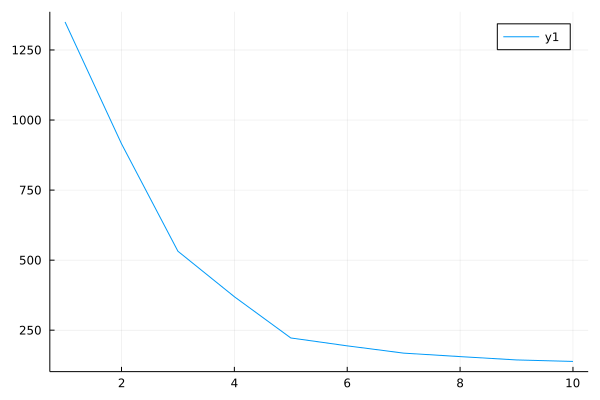

In [16]:
plot(range(1,10),elbow)

In [17]:
assignment, reps= k_means(df_customers_filtered,5);

In [18]:
k=5;
grps = [[df_customers_filtered[i] for i=1:length(df_customers[:,2]) if assignment[i] == j] for j=1:k];

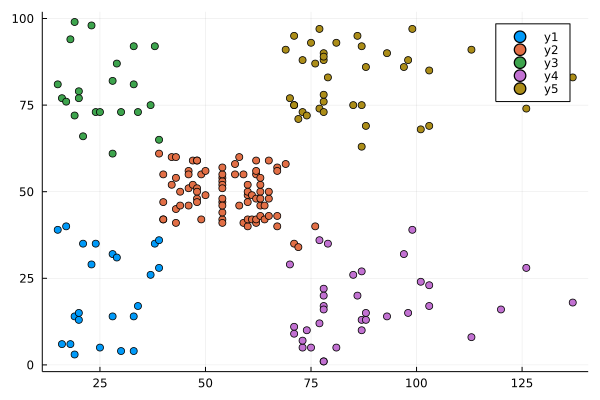

In [19]:
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]])
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]])
scatter!([c[1] for c in grps[3]], [c[2] for c in grps[3]])
scatter!([c[1] for c in grps[4]], [c[2] for c in grps[4]])
scatter!([c[1] for c in grps[5]], [c[2] for c in grps[5]])

# K-Means with Julia Packages

There are two packages for k-means clustering in Julia. 
These are:

1. Clustering.jl
2. ParallelKMeans.jl

Clustering.jl includes several commands for different clustering methods. This is more inclusive for clustering problems.
ParallelKMeans.jl specializes in the K-means algorithm. This package's aim is to increase the K-Means clustering algorithm performance and to offer a fast implementation.

In [20]:
Pkg.add("ParallelKMeans")
using ParallelKMeans

   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`


In [21]:
X = convert(Array{Float64}, Matrix(df_customers[:,4:5])');

In [22]:
df_customers_elbow = [kmeans(X, i).totalcost for i = 1:10];

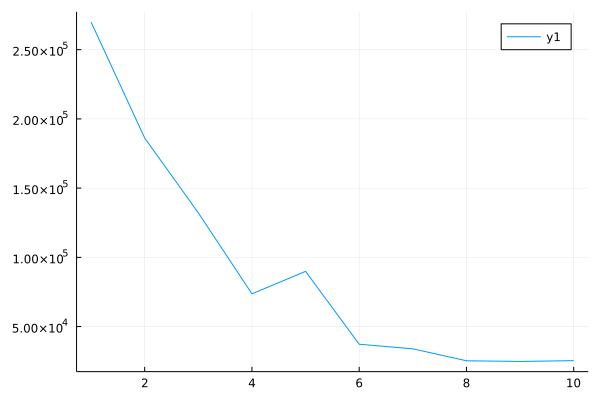

In [23]:
plot(range(1,10),df_customers_elbow)

In [24]:
df_customers_kmeans = kmeans(X, 5);

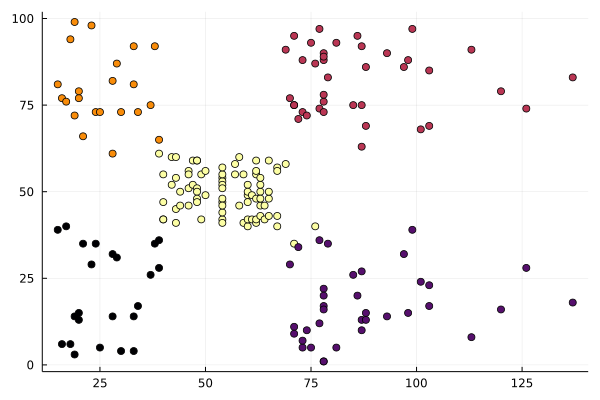

In [25]:
scatter(df_customers.AnnualIncome, df_customers.SpendingScore, marker_z=df_customers_kmeans.assignments, legend=false)

In [26]:
Pkg.add("Clustering")
using Clustering

   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`


In [27]:
df_customers_elbow = [Clustering.kmeans(X, i).totalcost for i = 1:10];

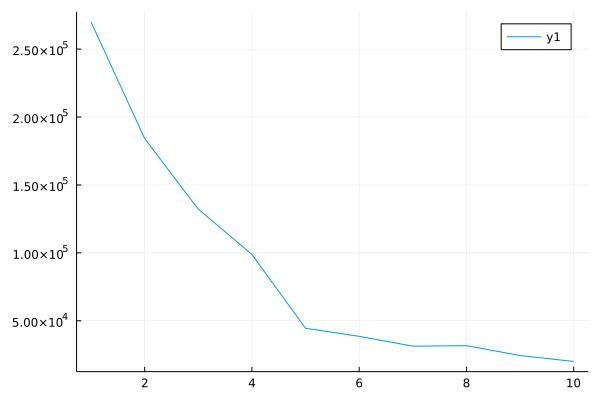

In [28]:
plot(range(1,10),df_customers_elbow)

In [29]:
df_customers_kmeans = Clustering.kmeans(X, 5);

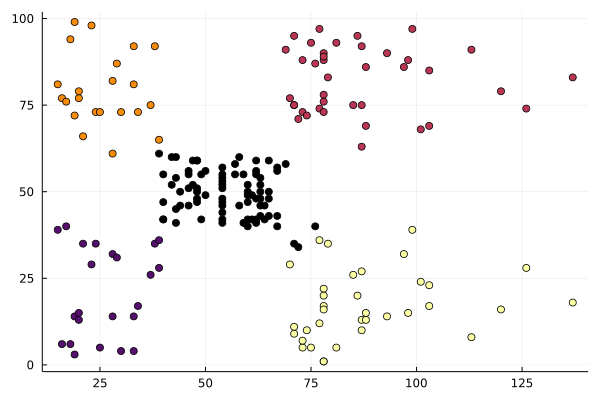

In [30]:
scatter(df_customers.AnnualIncome, df_customers.SpendingScore, marker_z=df_customers_kmeans.assignments, legend=false)

# 3-D Clustering 

Clustering can be applied to multiple dimensions.

In [31]:
X = convert(Array{Float64}, Matrix(df_customers[:,3:5])');

In [32]:
df_customers_elbow = [Clustering.kmeans(X, i).totalcost for i = 1:15];

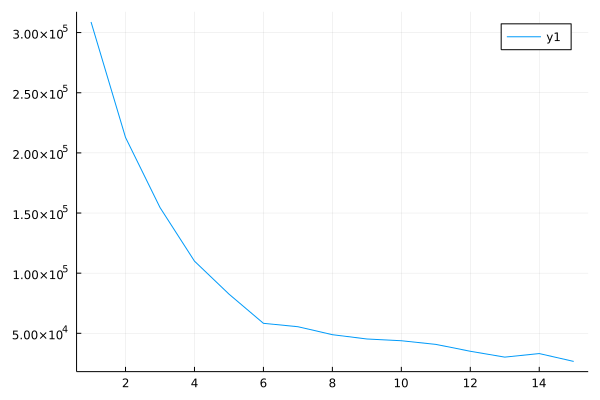

In [33]:
plot(range(1,15),df_customers_elbow)

In [34]:
df_customers_kmeans = ParallelKMeans.kmeans(X, 6);

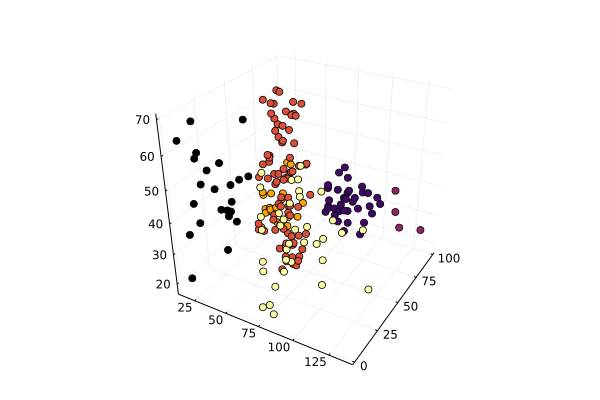

In [35]:
scatter(df_customers.AnnualIncome, df_customers.SpendingScore, df_customers.Age, marker_z=df_customers_kmeans.assignments, legend=false)

# Performance

BenchmarkTools makes performance tracking of Julia code easy by supplying a framework for writing and running groups of benchmarks as well as comparing benchmark results.

In [39]:
Pkg.add("BenchmarkTools")
using BenchmarkTools 

   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`


In [40]:
@btime df_customers_kmeans = ParallelKMeans.kmeans(X, 6);

  22.900 μs (23 allocations: 5.36 KiB)


In [41]:
@btime df_customers_kmeans = Clustering.kmeans(X, 6);

  33.500 μs (33 allocations: 25.42 KiB)
